# Parte 1. Priorizando Hipóteses

O arquivo `hypotheses_us.csv` contém nove hipóteses para aumentar a receita de uma loja online com Reach, Impact, Confidence e Effort especificados para cada um.

In [1]:
# Importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns
import datetime as dt

In [2]:
# Importando dataset hypotheses_us.csv
df_hyp = pd.read_csv('datasets/hypotheses_us.csv', sep=';')
df_hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


## Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.

In [3]:
df_hyp['ICE'] = (df_hyp['Impact'] * df_hyp['Confidence']) / df_hyp['Effort']
print(df_hyp[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


## Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.

In [4]:
df_hyp['RICE'] = (df_hyp['Reach'] * df_hyp['Impact'] * df_hyp['Confidence']) / df_hyp['Effort']
print(df_hyp[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


## Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE. Dê uma explicação para as alterações.

No framework RICE o alcance tem um papel muito importante, pois além de medir quão forte é a hipótese, o RICE leva em consideração quantos usuários a alteração afetará.

# Parte 2. Análise de teste A/B

Você realizou um teste A/B e obteve os resultados descritos nos arquivos `orders_us.csv` e `visitors_us.csv`.

Analise o teste A/B:

In [5]:
df_orders = pd.read_csv('datasets/orders_us.csv', parse_dates=['date'])
df_visits = pd.read_csv('datasets/visits_us.csv', parse_dates=['date'])

In [6]:
print(df_orders.head())
print(df_visits.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [7]:
df_orders.info()
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.

In [8]:
datesGroups = df_orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: df_orders[
        np.logical_and(
            df_orders['date'] <= x['date'], df_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(
    lambda x: df_visits[
        np.logical_and(
            df_visits['date'] <= x['date'], df_visits['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visits': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

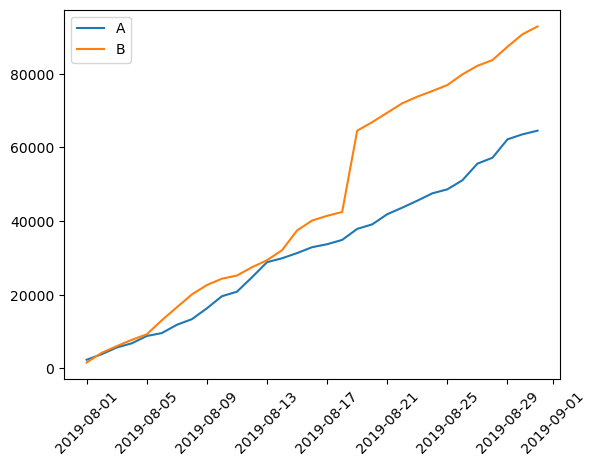

In [9]:
cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# construindo o gráfico de receita do grupo A 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construindo o gráfico de receita do grupo B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)

plt.legend()
plt.show()

O grupo B teve um grande salto no dia 17/08/2019, o que pode indicar que pedidos absurdamente grandes afetaram os resultados. Eles serão descartados para que seja conduzida a análise final.

## Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.

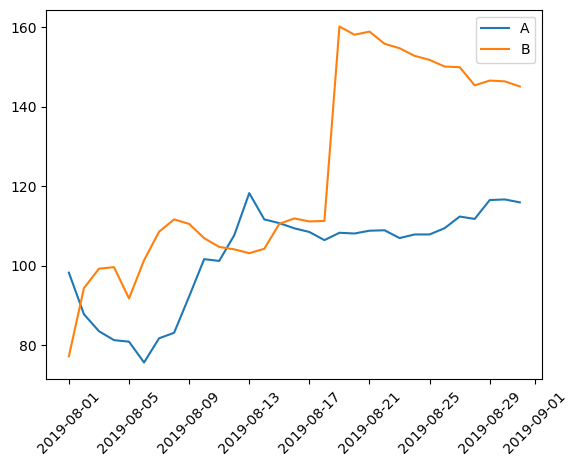

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)

plt.legend()

plt.show()

Os valores ainda apresentam flutuação, porém parece que caminham para estabilização com liderança clara do grupo B. Talvez ainda seja interessante continuar os testes mais algum tempo. De qualquer forma, serão analisados os valores atípicos que causam o pico no dia 17/08/2019.

## Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A. Faça conclusões e crie conjecturas.

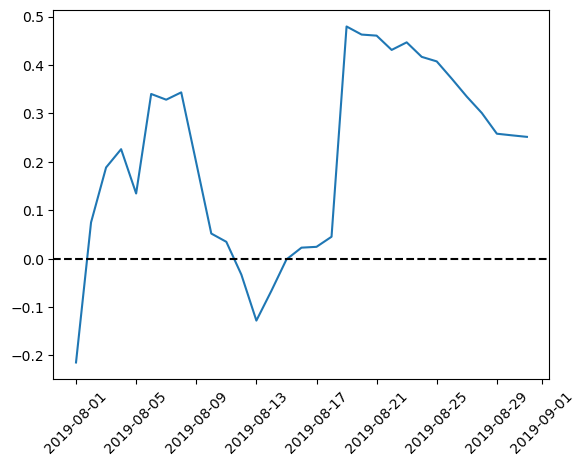

In [11]:
# reunindo os dados em um DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)

plt.show()

Há diversas ocorrências de alterações repentinas e consideráveis. Talvez elas estejam relacionadas a pedidos muito maiores do que o padrão.

## Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia. Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas.

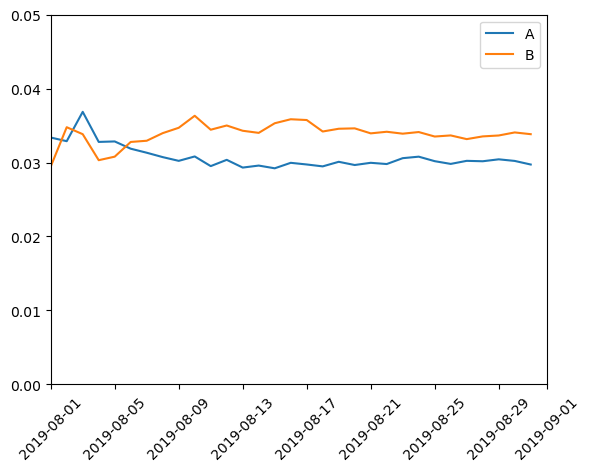

In [12]:
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construindo os gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# definindo a escala dos eixos
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])

plt.xticks(rotation=45)

plt.show()

No começo do teste, o segmento A possuía uma taxa de conversão maior, mas o segmento B gradualmente cresceu e se estabilizou em um valor praticamente estável.

## Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A. Tire conclusões e crie conjecturas.

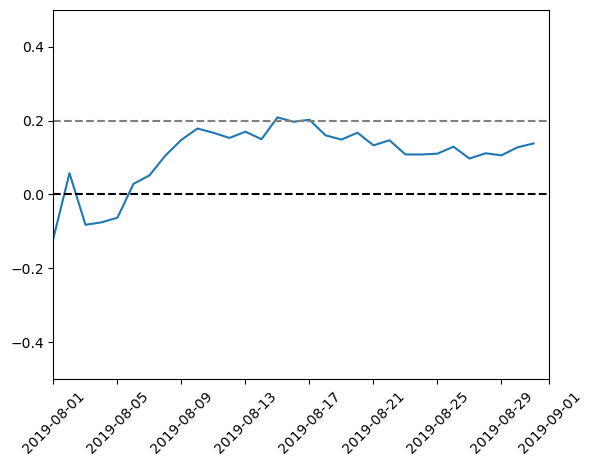

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])

plt.xticks(rotation=45)

plt.show()

O grupo B foi o líder em conversão quase desde o começo. Ele teve um ganho constante, e no final uma leve perda, se estabilizando cerca de 15% acima do grupo A.

## Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [14]:
print(df_orders.head())
print(df_visits.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [15]:
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [16]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Menos de 5% dos usuários fez mais do que dois pedidos, e menos de 1% fez mais do que 4. Sendo assim, 5 ou mais pedidos por usuário já pode ser considerado uma anomalia.

## Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.

In [17]:
print(df_orders.sort_values(by='revenue',ascending=False).head(10))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A


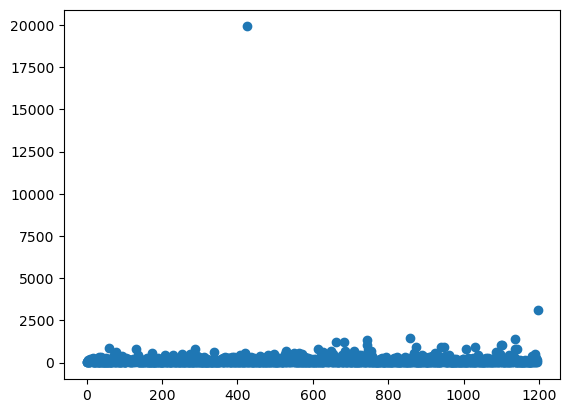

In [18]:
x_values = pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])
plt.show()

Existem apenas 2 pedidos acima de 1500 dólares, e um deles é de quase 20000, o que é claramente anormal.

## Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [19]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[435.54  900.904]


Pedidos acima de 900 dólares já podem ser considerados anomalias, pois são bastante raros.

## Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

In [20]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [21]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


O valor-p é consideravelmente menor do que 0.05, então nós rejeitamos a hipótese nula. A análise dos dados brutos mostrou que as taxas de conversão dos grupos possuem diferenças estatísticas significativas. O ganho de conversão relativo para o grupo B, comparado com o grupo A, é 13.8%. 

## Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

In [22]:
print('{0:.3f}'.format(st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


O valor P é muito maior que 0.05, havendo então grandes diferenças estatísticas entre os tamanhos médios de pedidos dos grupos, e a diferença relativa é de 25.2%, mostrando o quão afetados os dados foram pelas anomalias.

## Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

In [23]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 900]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64


In [24]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


Assim como ocorreu com os dados brutos, atingimos o nível de significância. O segmento B é muito melhor do que o segmento A.

## Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

In [25]:
print('{0:.3f}'.format(st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.5f}'.format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.819
-0.00598


Ao utilizar apenas os dados filtrados obtivemos o valor P de 0.819, o que mostra que não há diferença estatística significativa. Além disso a diferença percentual média das receitas é quase nula.

## Tome uma decisão com base nos resultados do teste. As decisões possíveis são:
1. Pare o teste, considere um dos grupos o líder.
2. Pare o teste, conclua que não há diferença entre os grupos.
3. Continue o teste.


Como vimos, o grupo B é claramente melhor em conversão, porém o volume de vendas é praticamente o mesmo. O melhor seria parar o teste e considerar o grupo B como líder, pois a taxa de conversão é mais alta, apesar do volume de vendas praticamente igual.